In [19]:
import numpy as np
import imgaug as ia
from imgaug import augmenters as iaa
from imgaug.augmentables.bbs import BoundingBoxesOnImage
import os
import glob
import cv2
import matplotlib.pyplot as plt

In [4]:
root_dir = "H:/dataset/ICDAR2015/"
img_dir = os.path.join(root_dir,"training_images")
gt_dir = os.path.join(root_dir,"training_gts")

imgs = glob.glob(os.path.join(img_dir,"*.jpg"))
gts = glob.glob(os.path.join(gt_dir, "*.txt"))

imgs.sort(key=lambda x: int(x.split('.')[0].split('_')[2]))
gts.sort(key=lambda x: int(x.split('.')[0].split('_')[3]))

In [9]:
def readData(index):
    img_path = imgs[index]
    gt_path = gts[index]

    img = cv2.imread(img_path)
    img = np.array(img)
    img = img[:,:,::-1] #bgr->rgb

    with open(gts[index], encoding='utf-8') as f:
        lines = f.readlines()
        gt = [line.lstrip('\ufeff').rstrip('\n').split(',') for line in lines]

    gt = np.array(gt)
    label = np.array(gt[:,8:])
    boxes = np.array(gt[:,:8])
    return img, boxes, label

img,boxes,label = readData(0)
print(img.shape,boxes.shape,label.shape)

(720, 1280, 3) (7, 8) (7, 1)


array([['377', '117', '463', '117', '465', '130', '378', '130'],
       ['493', '115', '519', '115', '519', '131', '493', '131'],
       ['374', '155', '409', '155', '409', '170', '374', '170'],
       ['492', '151', '551', '151', '551', '170', '492', '170'],
       ['376', '198', '422', '198', '422', '212', '376', '212'],
       ['494', '190', '539', '189', '539', '205', '494', '206'],
       ['374', '1', '494', '0', '492', '85', '372', '86']], dtype='<U15')

[BoundingBox(x1=377.0000, y1=117.0000, x2=465.0000, y2=130.0000, label=None),
 BoundingBox(x1=493.0000, y1=115.0000, x2=519.0000, y2=131.0000, label=None),
 BoundingBox(x1=374.0000, y1=155.0000, x2=409.0000, y2=170.0000, label=None),
 BoundingBox(x1=492.0000, y1=151.0000, x2=551.0000, y2=170.0000, label=None),
 BoundingBox(x1=376.0000, y1=198.0000, x2=422.0000, y2=212.0000, label=None),
 BoundingBox(x1=494.0000, y1=189.0000, x2=539.0000, y2=206.0000, label=None),
 BoundingBox(x1=372.0000, y1=0.0000, x2=494.0000, y2=86.0000, label=None)]

<Figure size 1080x1080 with 0 Axes>

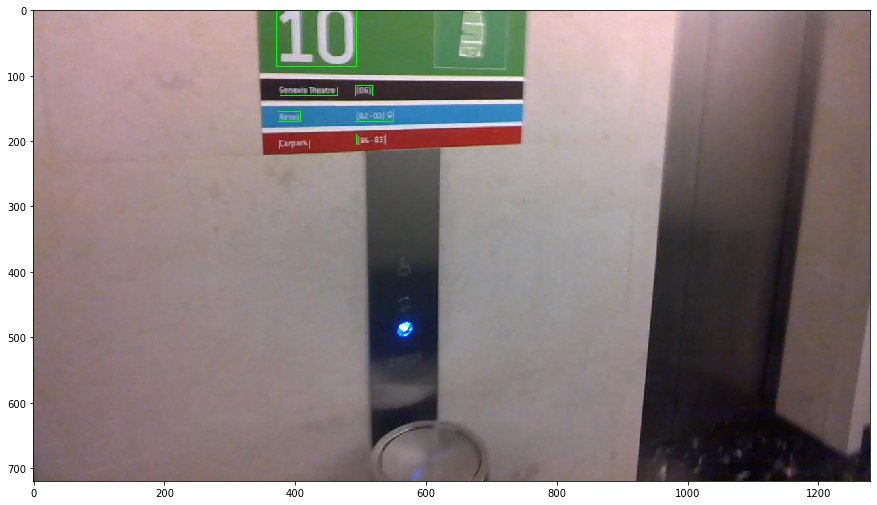

In [24]:
bbs = BoundingBoxesOnImage.from_point_soups(boxes,shape=img.shape)
img_bbs = bbs.draw_on_image(img)

boxes
bbs.items
plt.figure(figsize=(15,15))
plt.imshow(img_bbs)

<Figure size 1080x1080 with 0 Axes>

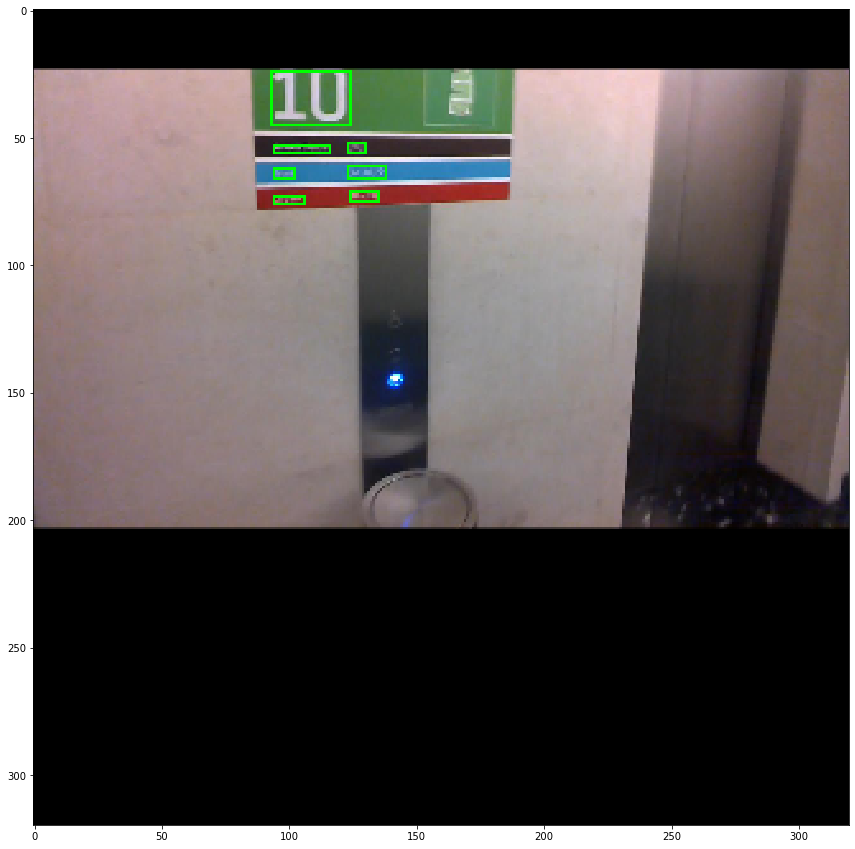

In [32]:
seq = iaa.Sequential([
    iaa.PadToSquare(),
    iaa.Resize(320)
])

image_aug, bbs_aug = seq(image=img,bounding_boxes=bbs)
image_after = bbs_aug.draw_on_image(image_aug)

plt.figure(figsize=(15,15))
plt.imshow(image_after)